# Exploratory Data Analysis on Marketing Data 

This notebook aims to perform an exploratory analysis on marketing data, in addition to testing potential hypothesis related to the dataset. Furthermore, it aims to gain insights from the data and understand which marketing campaigns in the dataset are working and which are not. The notebook both aims to conduct the analysis of the marketing data in addition to examplify avaliable methods used in feature engineering and data wrangling to prepare data for specific types of use cases/machine learning algorithms. 


The notebook is divided into 4 sections: 

1. Data Wrangling (data cleaning, feature engineering)
2. Key Findings & Insights (data visualisation)
3. Statistical Analysis (hypothesis tests)
4. Further Thoughts


The dataset marketing_data.csv consists of 2,240 customers of XYZ company with data on the following. 
   - Customer profiles
   - Product preferences
   - Campaign successes/failures
   - Channel performance 
   

©️ Hedvig Brekke | Link to the dataset on Kaggle: https://tinyurl.com/ypsccvpz

In [1]:
#importing packages 
import pandas as pd
import numpy as np
from numpy import percentile
import seaborn as sns
from datetime import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import norm
import plotly.figure_factory as ff
import random
import matplotlib.cbook as cbook
import matplotlib.dates as mdates

In [2]:
#loading the dataset 
datafile = "data/marketing_data.csv"
df = pd.read_csv(datafile, sep=',', header=0, parse_dates=['Dt_Customer'], index_col=['ID'])
df = df.sort_values(by='ID')
df

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
ID,,,,,,,,,,,,,,,,,,,,,
0,1985,Graduation,Married,"$70,951.00",0,0,2013-05-04,66,239,10,...,9,1,0,0,0,0,0,0,0,SA
1,1961,Graduation,Single,"$57,091.00",0,0,2014-06-15,0,464,5,...,7,5,0,0,0,0,1,1,0,CA
9,1975,Master,Single,"$46,098.00",1,1,2012-08-18,86,57,0,...,2,8,0,0,0,0,0,0,0,CA
13,1947,PhD,Widow,"$25,358.00",0,1,2013-07-22,57,19,0,...,3,6,0,0,0,0,0,0,0,SA
17,1971,PhD,Married,"$60,491.00",0,1,2013-09-06,81,637,47,...,7,5,0,0,0,0,0,0,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11178,1972,Master,Single,"$42,394.00",1,0,2014-03-23,69,15,2,...,3,7,0,0,0,0,0,0,0,GER
11181,1949,PhD,Married,"$156,924.00",0,0,2013-08-29,85,2,1,...,0,0,0,0,0,0,0,0,0,CA
11187,1978,Basic,Single,"$26,487.00",1,0,2013-05-20,23,2,8,...,3,5,0,0,0,0,0,0,0,CA


# 1. Data Wrangling

To explore the dataset we aim to identify the shape of the dataset, identify the datatypes of the features, check for skew, and treat the empty cells and outliers and explore the categorical features. For data cleaning and feature engineering, the following actions are considered. 

<b>Data Cleaning</b>:
- Changing numeric columns to numeric and categorical to object
- Removing unwanted symbols like '$' and ',' from numeric columns
- Changing 'Year_Birth' to age
- Treating outliers using IQR for all numeric columns

<b>Feature Engineering</b>: 
- Cheking for skew 
- Log transformation of skewed variables

In [3]:
df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', ' Income ', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [4]:
#renaming the columns as the 'Income' column had a space 
df.columns = ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country']
display(df)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
ID,,,,,,,,,,,,,,,,,,,,,
0,1985,Graduation,Married,"$70,951.00",0,0,2013-05-04,66,239,10,...,9,1,0,0,0,0,0,0,0,SA
1,1961,Graduation,Single,"$57,091.00",0,0,2014-06-15,0,464,5,...,7,5,0,0,0,0,1,1,0,CA
9,1975,Master,Single,"$46,098.00",1,1,2012-08-18,86,57,0,...,2,8,0,0,0,0,0,0,0,CA
13,1947,PhD,Widow,"$25,358.00",0,1,2013-07-22,57,19,0,...,3,6,0,0,0,0,0,0,0,SA
17,1971,PhD,Married,"$60,491.00",0,1,2013-09-06,81,637,47,...,7,5,0,0,0,0,0,0,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11178,1972,Master,Single,"$42,394.00",1,0,2014-03-23,69,15,2,...,3,7,0,0,0,0,0,0,0,GER
11181,1949,PhD,Married,"$156,924.00",0,0,2013-08-29,85,2,1,...,0,0,0,0,0,0,0,0,0,CA
11187,1978,Basic,Single,"$26,487.00",1,0,2013-05-20,23,2,8,...,3,5,0,0,0,0,0,0,0,CA


In [5]:
#creating an age column based on 'Year_birth'
df['Age'] = df['Year_Birth'].apply(lambda x: (2021 - x))

In [6]:
#drop useless columns
df = df.drop(['Year_Birth'], axis=1)

In [7]:
#removing comma and dollar sign
df['Income'] = df['Income'].str.replace(',', '')
df['Income'] = df['Income'].str.replace('$', '')

<ipython-input-7-c2ab7b0e9af8>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Income'] = df['Income'].str.replace('$', '')


In [8]:
#converting 'Income' to numeric
df['Income'] = df['Income'].astype('float').fillna(0)
df['Income'] = df['Income'].astype('int')

In [9]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'Age'],
      dtype='object')

In [10]:
#reordering columns
df = df.reindex(columns=['Dt_Customer','Education', 'Marital_Status','Country', 'Income','Age', 
        'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Kidhome', 'Teenhome', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain'])

In [11]:
#checking the datatypes for all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 11191
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Dt_Customer          2240 non-null   datetime64[ns]
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Country              2240 non-null   object        
 4   Income               2240 non-null   int64         
 5   Age                  2240 non-null   int64         
 6   Recency              2240 non-null   int64         
 7   MntWines             2240 non-null   int64         
 8   MntFruits            2240 non-null   int64         
 9   MntMeatProducts      2240 non-null   int64         
 10  MntFishProducts      2240 non-null   int64         
 11  MntSweetProducts     2240 non-null   int64         
 12  MntGoldProds         2240 non-null   int64         
 13  NumDealsPurchases    2240 non-nu

In [12]:
#checking for null values 
df.isnull().sum()

Dt_Customer            0
Education              0
Marital_Status         0
Country                0
Income                 0
Age                    0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Kidhome                0
Teenhome               0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
dtype: int64

In [13]:
#q25 and q75 for the 'Income' column 
q25, q75 = df['Income'].quantile(0.25), df['Income'].quantile(0.75)
iqr = q75 - q25
print(iqr)
print(q25)
print(q75)

33567.75
34722.0
68289.75


<b>Comment</b>: We replace the 0-values in 'Income' with the calculated IQR for the column. In this case, this should be fine as there are only 24 0-values, however in cases where more 0-values are present, they should be replaced with random values in between Q1 and Q3. 

In [14]:
#replace nan-values with iqr to keep the distribution about the same
df['Income'] = df.Income.replace(0, 33567)
df['Income'].value_counts()

33567    24
7500     12
35860     4
83844     3
18929     3
         ..
30168     1
44503     1
62513     1
36301     1
64108     1
Name: Income, Length: 1975, dtype: int64

In [15]:
#checking that there are no missing values anymore 
df['Income'].isnull().sum()

0

In [16]:
#displaying the dataframe
display(df.sort_index())

,Dt_Customer,Education,Marital_Status,Country,Income,Age,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
ID,,,,,,,,,,,,,,,,,,,,,
0,2013-05-04,Graduation,Married,SA,70951,36,66,239,10,554,...,1,0,0,0,0,0,0,0,0,0
1,2014-06-15,Graduation,Single,CA,57091,60,0,464,5,64,...,5,0,0,0,0,0,0,1,1,0
9,2012-08-18,Master,Single,CA,46098,46,86,57,0,27,...,8,1,1,0,0,0,0,0,0,0
13,2013-07-22,PhD,Widow,SA,25358,74,57,19,0,5,...,6,0,1,0,0,0,0,0,0,0
17,2013-09-06,PhD,Married,SP,60491,50,81,637,47,237,...,5,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11178,2014-03-23,Master,Single,GER,42394,49,69,15,2,10,...,7,1,0,0,0,0,0,0,0,0
11181,2013-08-29,PhD,Married,CA,156924,72,85,2,1,2,...,0,0,0,0,0,0,0,0,0,0
11187,2013-05-20,Basic,Single,CA,26487,43,23,2,8,10,...,5,1,0,0,0,0,0,0,0,0


In [17]:
#dataframe with all categorical values 
df_cat = df.select_dtypes(include='object')
display(df_cat)

,Education,Marital_Status,Country
ID,,,
0,Graduation,Married,SA
1,Graduation,Single,CA
9,Master,Single,CA
13,PhD,Widow,SA
17,PhD,Married,SP
...,...,...,...
11178,Master,Single,GER
11181,PhD,Married,CA
11187,Basic,Single,CA


In [18]:
#dataframe with all numeric values 
df_num = df.select_dtypes(include='number')
display(df_num)

,Income,Age,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,NumWebVisitsMonth,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
ID,,,,,,,,,,,,,,,,,,,,,
0,70951,36,66,239,10,554,254,87,54,1,...,1,0,0,0,0,0,0,0,0,0
1,57091,60,0,464,5,64,7,0,37,1,...,5,0,0,0,0,0,0,1,1,0
9,46098,46,86,57,0,27,0,0,36,4,...,8,1,1,0,0,0,0,0,0,0
13,25358,74,57,19,0,5,0,0,8,2,...,6,0,1,0,0,0,0,0,0,0
17,60491,50,81,637,47,237,12,19,76,4,...,5,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11178,42394,49,69,15,2,10,0,1,4,1,...,7,1,0,0,0,0,0,0,0,0
11181,156924,72,85,2,1,2,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
11187,26487,43,23,2,8,10,12,14,23,3,...,5,1,0,0,0,0,0,0,0,0


In [19]:
#column with date and time 
df_date = df.select_dtypes(include='datetime64[ns]')
display(df_date)

,Dt_Customer
ID,
0,2013-05-04
1,2014-06-15
9,2012-08-18
13,2013-07-22
17,2013-09-06
...,...
11178,2014-03-23
11181,2013-08-29
11187,2013-05-20


In [20]:
#the IQR for each relevant numerical column
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Income                 33567.75
Age                       18.00
Recency                   50.00
MntWines                 480.50
MntFruits                 32.00
MntMeatProducts          216.00
MntFishProducts           47.00
MntSweetProducts          32.00
MntGoldProds              47.00
NumDealsPurchases          2.00
NumWebPurchases            4.00
NumCatalogPurchases        4.00
NumStorePurchases          5.00
NumWebVisitsMonth          4.00
Kidhome                    1.00
Teenhome                   1.00
AcceptedCmp3               0.00
AcceptedCmp4               0.00
AcceptedCmp5               0.00
AcceptedCmp1               0.00
AcceptedCmp2               0.00
Response                   0.00
Complain                   0.00
dtype: float64


<b>Comment</b>: To remove outliers we are using the IQR method. The IQR method can sometimes be a bit more robust compared to the Z-score as the Z-score takes the outliers into account when calculating mean and the standard deviation used to calculate the Z-score. When removing outliers it is always important to take into account how much data it is worth loosing versus the distortion the outliers can possibly cause. 

In [21]:
df_num_selected = df_num[['Age', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

In [22]:
#using IQR to remove outliers 
df_num_selected = df_num_selected[~((df_num_selected < (Q1 - 1.5 * IQR))|(df_num_selected > (Q3 + 1.5 * IQR))).any(axis=1)]
df_num_selected

<ipython-input-22-3e06fe9f7313>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_num_selected = df_num_selected[~((df_num_selected < (Q1 - 1.5 * IQR))|(df_num_selected > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-22-3e06fe9f7313>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_num_selected = df_num_selected[~((df_num_selected < (Q1 - 1.5 * IQR))|(df_num_selected > (Q3 + 1.5 * IQR))).any(axis=1)]


,Age,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
ID,,,,,,,,,,,,,,
1,60,57091,0,464,5,64,7,0,37,1,7,3,7,5
9,46,46098,86,57,0,27,0,0,36,4,3,2,2,8
13,74,25358,57,19,0,5,0,0,8,2,1,0,3,6
20,56,46891,91,43,12,23,29,15,61,1,2,1,4,4
22,45,46310,99,185,2,88,15,5,14,2,6,1,5,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11176,51,65968,12,376,9,83,19,4,4,2,5,4,7,3
11178,49,42394,69,15,2,10,0,1,4,1,1,0,3,7
11187,43,26487,23,2,8,10,12,14,23,3,2,1,3,5


In [23]:
#columns of the clean numeric dataset
df_num_selected.columns

Index(['Age', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

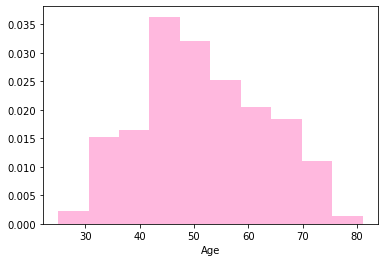

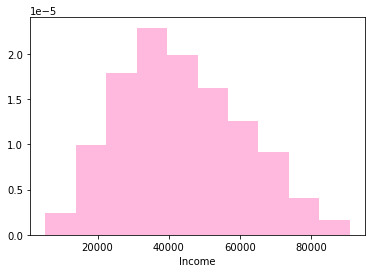

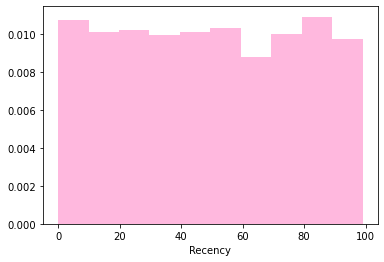

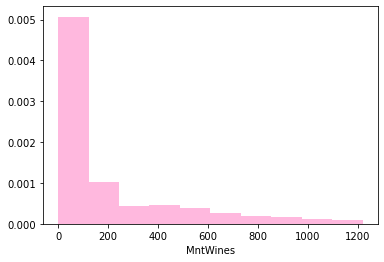

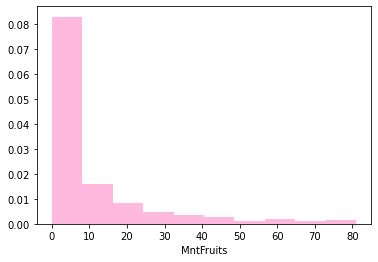

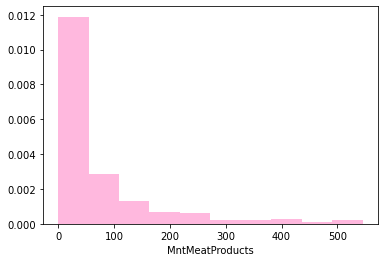

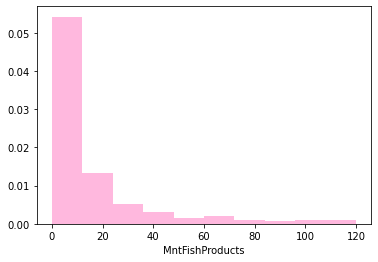

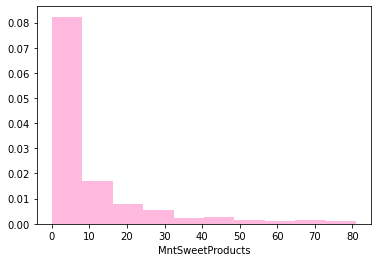

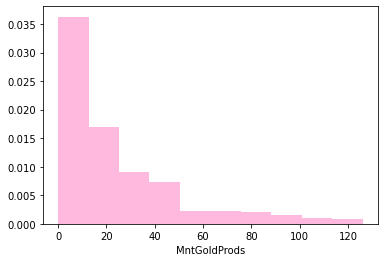

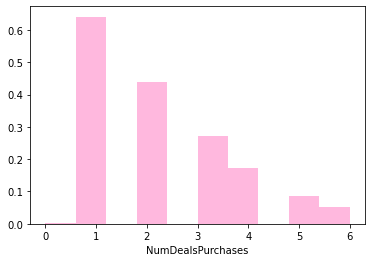

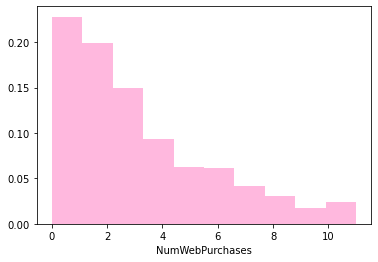

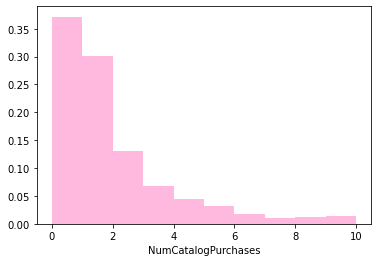

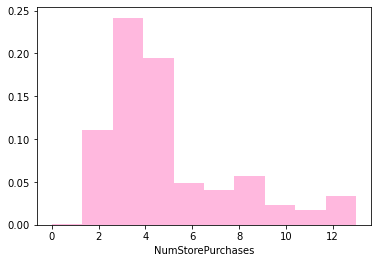

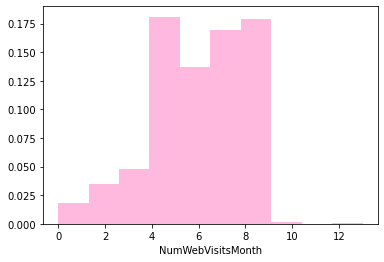

In [24]:
#plotting the distributions of each of the non-binary numeric columns

df_num_selected = df_num_selected.astype('int')

for i, col in enumerate(df_num_selected.columns):
    plt.figure(i)
    plt.xlabel(col)
    plt.hist(df_num_selected[col], bins=10,density=True, alpha=0.3, color='deeppink')

In [25]:
#looking at the descriptive of the non-binary columns
df_num_selected.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1534.0,51.610169,11.325605,25.0,44.00,50.0,61.00,81.0
Income,1534.0,43364.617992,17141.560535,5305.0,30630.25,41925.0,55585.50,90933.0
Recency,1534.0,49.059974,29.077090,0.0,24.00,49.0,75.00,99.0
MntWines,1534.0,189.250978,266.511838,0.0,13.00,53.5,254.00,1218.0
MntFruits,1534.0,10.403520,15.745017,0.0,1.00,4.0,12.00,81.0
MntMeatProducts,1534.0,70.374185,100.901427,0.0,11.00,26.0,84.75,545.0
MntFishProducts,1534.0,15.173403,23.314127,0.0,2.00,6.0,17.00,120.0
MntSweetProducts,1534.0,10.472621,15.752040,0.0,1.00,4.0,13.00,81.0
MntGoldProds,1534.0,23.991525,25.650912,0.0,6.00,15.0,34.00,126.0
NumDealsPurchases,1534.0,2.260104,1.364258,0.0,1.00,2.0,3.00,6.0


<b>Comment</b>: After reviewing the distributions of the different features we have a rough idea of what numerical data we are working with. Further on, we visualise 'Income' and 'Age' in relation to the normal curve to see if they are close to normality. This is good to be aware of before we potentially apply further statistical methods. 

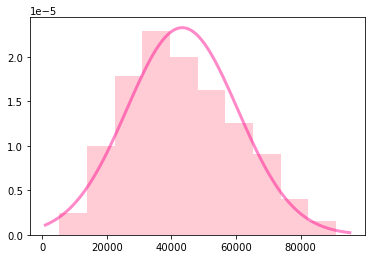

The mean is: 43364.617992177315
The standard deviation is: 17141.560534877495
The the variance is: 293833097.5708697


In [26]:
column = df_num_selected['Income']
mu, std = norm.fit(column)

#plotting the histogram
plt.hist(column, bins=10,density=True, alpha=0.8, color='pink')

#attaching the normal curve 
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=3, alpha=0.5, color='deeppink')
plt.show()

#displaying aggregations
print('The mean is:', column.mean())
print('The standard deviation is:', column.std())
print('The the variance is:', column.var())

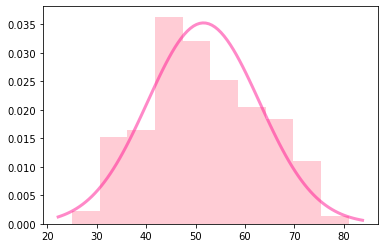

The mean is: 51.610169491525426
The standard deviation is: 11.32560501692087
The the variance is: 128.26932899930316


In [27]:
column = df_num_selected['Age']
mu, std = norm.fit(column)

#plotting the histogram
plt.hist(column, bins=10,density=True, alpha=0.8, color='pink')

#attaching the normal curve 
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, linewidth=3, alpha=0.5, color='deeppink')
plt.show()

#displaying aggregations
print('The mean is:', column.mean())
print('The standard deviation is:', column.std())
print('The the variance is:', column.var())

<b>Comment</b>: In the distributions we can see that some features are possibly left-skewed. Checking for skew and transforming skewed variables to be closer to normality is important when you are planning on using certain statistical tests or models <b>that assume normality</b>, this is true for methods like linear regression and most hypothesis tests. We are using a skew of (+/-) 1.5 to define which columns need transformation (keep in mind that this is a high skew limit). The ones that are over the skew limit are being log transformed with np.log1p as this type of transformation helps to erase skew and bring the distributions closer to normality (even though this might not be needed for this particular analysis, it's still useful to test out and examplify). 

In [28]:
#checking the columns for skew as some look left-skwed 

skew_vals = df_num_selected.skew()
skew_limit = 1.5 #columns with less skew are not included
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))
 
skew_cols['Mean'] = df_num_selected.mean() 
skew_cols['Std'] = df_num_selected.std()
skew_cols['Variance'] = df_num_selected.var()
skew_cols

,Skew,Mean,Std,Variance
MntFishProducts,2.440072,15.173403,23.314127,543.548516
MntMeatProducts,2.423917,70.374185,100.901427,10181.097989
MntFruits,2.364130,10.403520,15.745017,247.905558
MntSweetProducts,2.307637,10.472621,15.752040,248.126778
NumCatalogPurchases,1.960762,1.502608,1.950043,3.802668
MntWines,1.759193,189.250978,266.511838,71028.559931
MntGoldProds,1.719848,23.991525,25.650912,657.969269


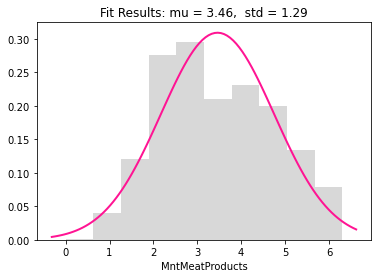

<Figure size 432x288 with 0 Axes>

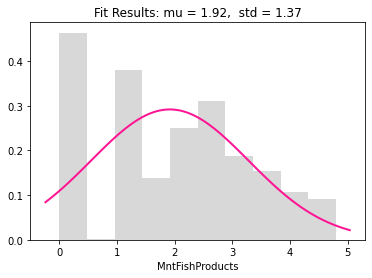

<Figure size 432x288 with 0 Axes>

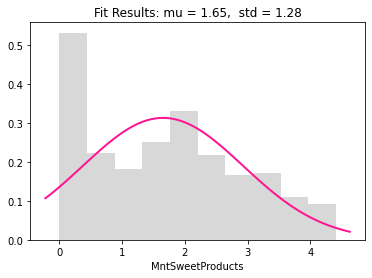

<Figure size 432x288 with 0 Axes>

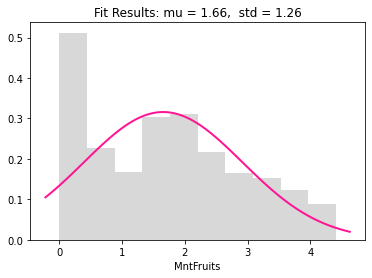

<Figure size 432x288 with 0 Axes>

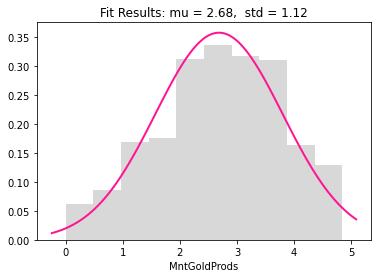

<Figure size 432x288 with 0 Axes>

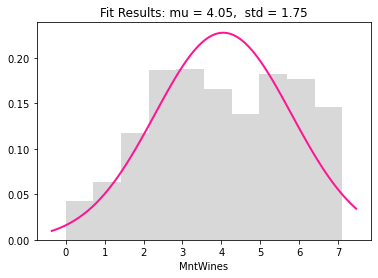

<Figure size 432x288 with 0 Axes>

In [29]:
df_log = df_num_selected[['MntMeatProducts','MntFishProducts','MntSweetProducts','MntFruits', 'MntGoldProds', 'MntWines']]

df_log = df_log.applymap(lambda x: np.log1p(x))

for i, col in enumerate(df_log.columns):
    
    mu, std = norm.fit(df_log[col])
    
    plt.hist(df_log[col], bins=10,density=True, alpha=0.3, color='grey')
    
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, linewidth=2, color='deeppink')
    title = "Fit Results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)

    plt.xlabel(col)
    plt.figure(col)
    plt.show(col)

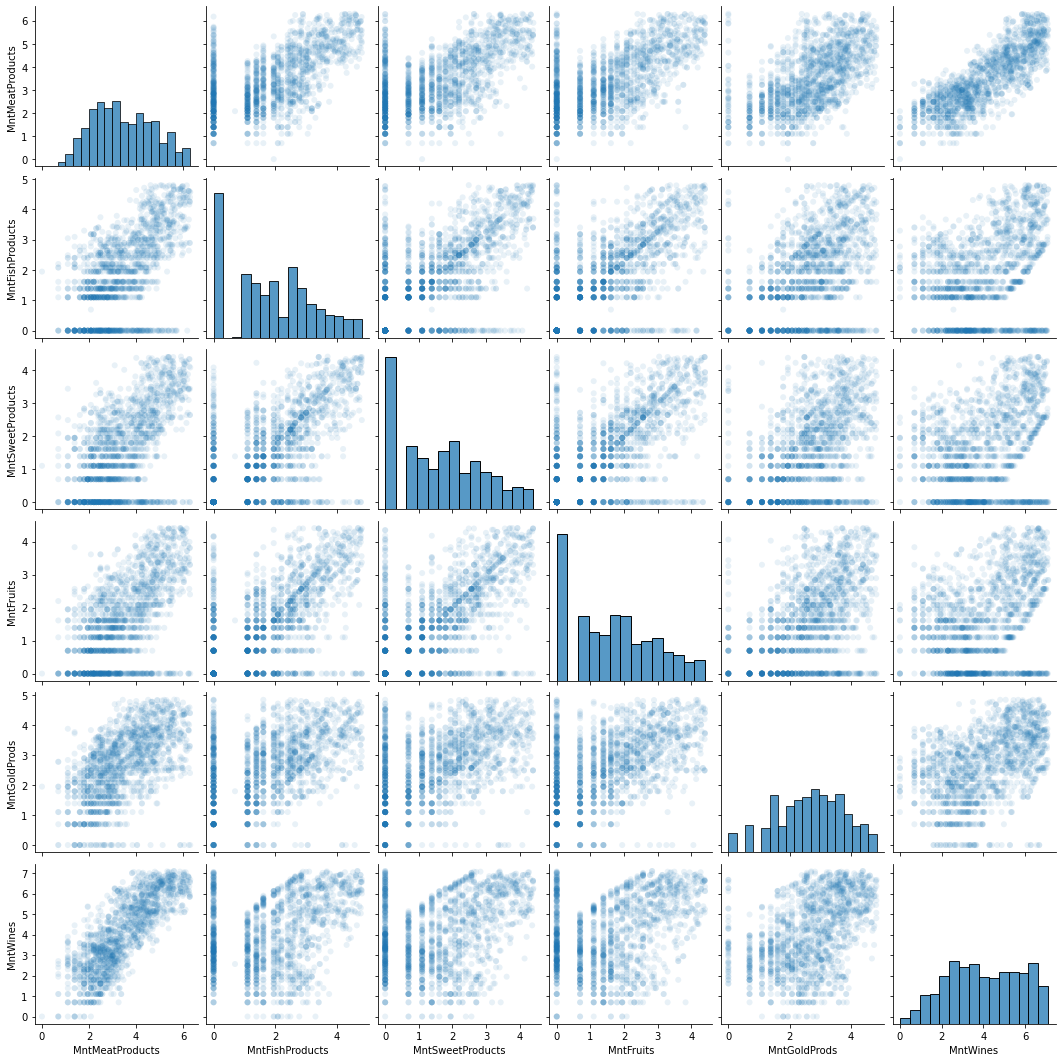

In [30]:
#plotting the log-transformed variables 
sns.pairplot(df_log, plot_kws=dict(alpha=.1, edgecolor='none'))

<b>Comment</b>: As we see in the pairplot, the previously skewed variables are now less skewed to the left and have a more linear relaionship with the other variables.  

In [31]:
#creating a final dataframe 

#updating df_num_clean with the transformed features 
df_num_selected[['MntMeatProducts','MntFishProducts','MntSweetProducts','MntFruits', 'MntGoldProds', 'MntWines']] = df_log.values

#sorting the index to avoid duplicates 
df_num_selected.sort_index()
df_cat.sort_index()

#merge with numeric columns
df_final = df_cat.merge(df_num_selected, on = 'ID')

df_accepted = df[['AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Response','Complain']]

#merge with the binary columns previously masked 
df_final = df_final.merge(df_accepted, on = 'ID')

#merge with the binary columns previously masked 
df_final = df_final.merge(df_date, on = 'ID')

#adding column with total accepted campaigns 
sum_column = df_final['AcceptedCmp3'] + df_final['AcceptedCmp4'] + df_final['AcceptedCmp5'] + df_final['AcceptedCmp1'] + df_final['AcceptedCmp2']
df_final["Count_Accepted"] = sum_column

#adding column with total purchased campaigns 
sum_pur = df_final['NumStorePurchases'] + df_final['NumCatalogPurchases'] + df_final['NumWebPurchases'] 
df_final["Count_Purchased"] = round(sum_pur, 2)

#adding a column where ages are grouped 
df_final['Age_Groups'] = pd.cut(df_final['Age'], 5, labels= ['24-36', '36-47', '47-58', '58-69', '69-81+'])


#displaying tha final dataframe that we can now visualize 
display(df_final)

,Education,Marital_Status,Country,Age,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Dt_Customer,Count_Accepted,Count_Purchased,Age_Groups
ID,,,,,,,,,,,,,,,,,,,,,
1,Graduation,Single,CA,60,57091,0,6.142037,1.791759,4.174387,2.079442,...,0,0,0,1,1,0,2014-06-15,1,17,58-69
9,Master,Single,CA,46,46098,86,4.060443,0.000000,3.332205,0.000000,...,0,0,0,0,0,0,2012-08-18,0,7,36-47
13,PhD,Widow,SA,74,25358,57,2.995732,0.000000,1.791759,0.000000,...,0,0,0,0,0,0,2013-07-22,0,4,69-81+
20,2n Cycle,Married,GER,56,46891,91,3.784190,2.564949,3.178054,3.401197,...,0,0,0,0,0,0,2013-09-01,0,7,47-58
22,Graduation,Divorced,SP,45,46310,99,5.225747,1.098612,4.488636,2.772589,...,0,0,0,0,0,0,2012-12-03,0,12,36-47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11176,PhD,Together,CA,51,65968,12,5.932245,2.302585,4.430817,2.995732,...,0,0,0,0,0,0,2014-05-12,0,16,47-58
11178,Master,Single,GER,49,42394,69,2.772589,1.098612,2.397895,0.000000,...,0,0,0,0,0,0,2014-03-23,0,4,47-58
11187,Basic,Single,CA,43,26487,23,1.098612,2.197225,2.397895,2.564949,...,0,0,0,0,0,0,2013-05-20,0,6,36-47


In [32]:
df_final.columns

Index(['Education', 'Marital_Status', 'Country', 'Age', 'Income', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Complain', 'Dt_Customer',
       'Count_Accepted', 'Count_Purchased', 'Age_Groups'],
      dtype='object')

<b>Comment</b>: Before visualising the data and looking at insights, we will run som basic descriptive statistics on the data to better understand the features. First we explore the categorical features in relation to the response, complains, amount of campaigns accepted and count of purchases to better understand the customer demographics. <b> We can for example see that graduated married people from Spain have a higher response, acceptence and purchase rate. </b> However, we can also see that married and single people have the same response rate, but that Married people complain more and purchase almost twice as much as Single people. 

In [33]:
#looking at 'Education' (mean gives the probability of any campaign being accepted)
agg_func_count = {'Response': ['sum'], 'Complain': ['sum'], 'NumStorePurchases': ['sum'], 'Count_Accepted': ['mean']}
df_final.groupby(['Education']).agg(agg_func_count)

,Response,Complain,NumStorePurchases,Count_Accepted
,sum,sum,sum,mean
Education,,,,
2n Cycle,9,2,542,0.111940
Basic,2,0,141,0.115385
Graduation,62,10,3389,0.172652
Master,28,2,1323,0.167910
PhD,58,1,1958,0.261236


In [34]:
#looking at 'Marital Status' (mean gives the probability of any campaign being accepted)
agg_func_count = {'Response': ['sum'], 'Complain': ['sum'], 'NumStorePurchases': ['sum'], 'Count_Accepted': ['mean']}
df_final.groupby(['Marital_Status']).agg(agg_func_count)

,Response,Complain,NumStorePurchases,Count_Accepted
,sum,sum,sum,mean
Marital_Status,,,,
Alone,1,0,12,0.333333
Divorced,19,1,759,0.154839
Married,49,7,2896,0.195652
Single,49,3,1502,0.183486
Together,33,4,1929,0.179551
Widow,7,0,243,0.208333
YOLO,1,0,12,0.000000


In [35]:
#looking at 'Country' (mean gives the probability of any campaign being accepted)
agg_func_count = {'Response': ['sum'], 'Complain': ['sum'], 'NumStorePurchases': ['sum'], 'Count_Accepted': ['mean']}
df_final.groupby(['Country']).agg(agg_func_count)

,Response,Complain,NumStorePurchases,Count_Accepted
,sum,sum,sum,mean
Country,,,,
AUS,11,0,501,0.117117
CA,17,1,794,0.162791
GER,9,1,411,0.258824
IND,7,0,529,0.172727
ME,1,0,15,0.500000
SA,24,3,1058,0.151376
SP,82,10,3670,0.193717
US,8,0,375,0.277778


In [36]:
#looking at 'Age' (mean gives the probability of any campaign being accepted)
agg_func_count = {'Response': ['sum'], 'Complain': ['sum'], 'NumStorePurchases': ['sum'], 'Count_Accepted': ['mean']}
df_final.groupby(['Age_Groups']).agg(agg_func_count)

,Response,Complain,NumStorePurchases,Count_Accepted
,sum,sum,sum,mean
Age_Groups,,,,
24-36,13,1,618,0.185430
36-47,49,7,1991,0.158940
47-58,56,1,2323,0.197556
58-69,27,3,1828,0.188623
69-81+,14,3,593,0.228571


In [37]:
#looking at success of different campaigns with age (mean gives the probability of THE campaign being accepted for the age group)
agg_func_count = {'AcceptedCmp1': ['sum'], 'AcceptedCmp2': ['sum'], 'AcceptedCmp3': ['sum'], 'AcceptedCmp4': ['sum'], 'AcceptedCmp5': ['sum']}
df_final.groupby(['Age_Groups']).agg(agg_func_count)

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
,sum,sum,sum,sum,sum
Age_Groups,,,,,
24-36,5,1,10,6,6
36-47,7,3,37,16,9
47-58,11,5,36,36,9
58-69,11,4,13,29,6
69-81+,2,0,6,10,6


# 2. Key Findings & Insights 

To better understand the insights that we can gain from this data we try to answer important questions like: 

- Which marketing campaign is most successful?
- Which products are performing best?
- Which channels are underperforming?
- What does the average customer look like for this company?


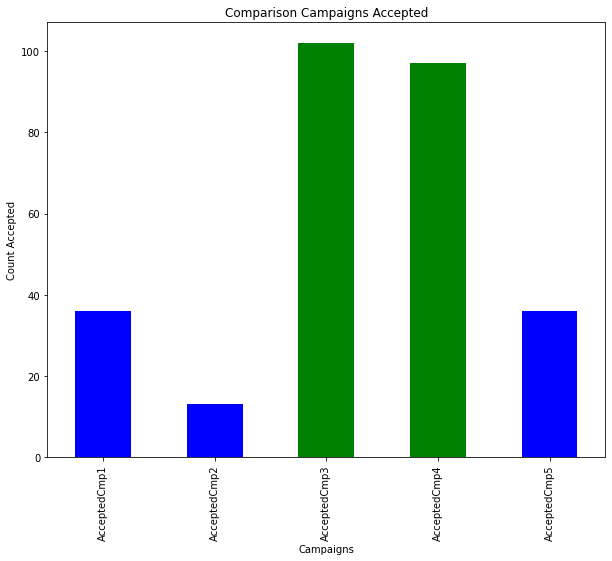

In [38]:
#Which marketing campaign is most successful? 
lst_accepted = df_final[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5']].sum(axis=0)

my_colors = list('bbggb') 
plt.figure(figsize=(10,8))
lst_accepted.plot(kind='bar', color=my_colors)

plt.title("Comparison Campaigns Accepted")
plt.ylabel('Count Accepted')
plt.xlabel('Campaigns')

plt.show()

<b>Comment</b>: By summing the number of total accepted campaigns for each column we can see that campaign 3 and 4 was most successful. 

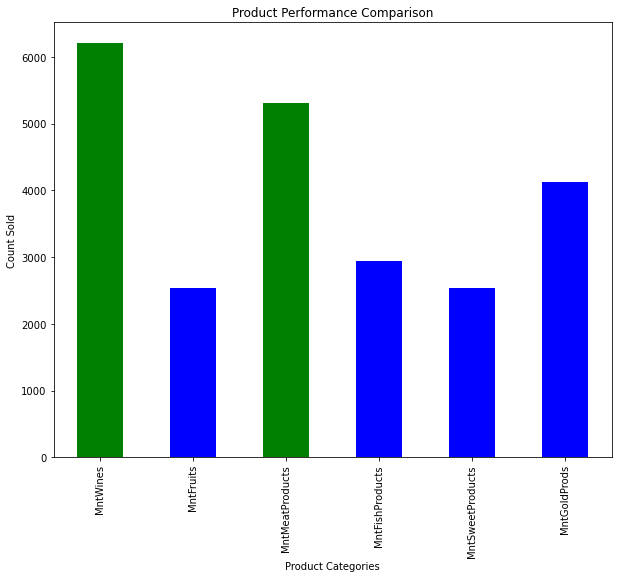

In [39]:
#Which products are performing best?
lst_accepted = df_final[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds']].sum(axis=0)

my_colors = list('gbgbbb') 
plt.figure(figsize=(10,8))
lst_accepted.plot(kind='bar', color=my_colors)

plt.title("Product Performance Comparison")
plt.ylabel('Count Sold')
plt.xlabel('Product Categories')

plt.show()

<b>Comment</b>: By summing the count of products sold for each category we can see that wines and meat are performing the best. 

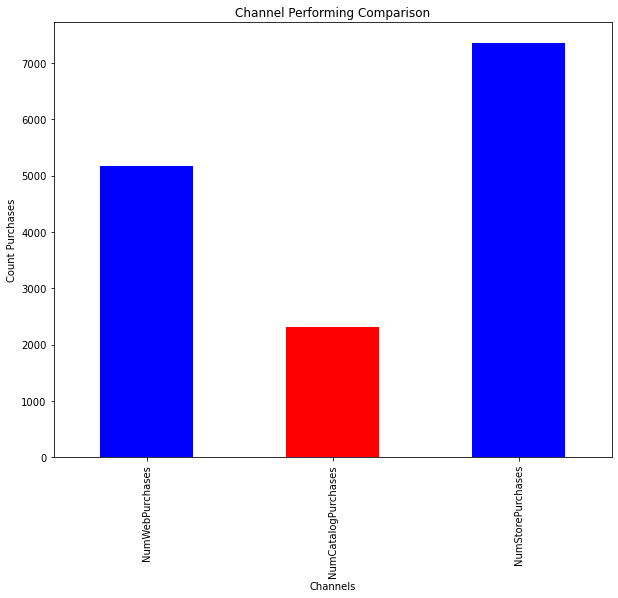

In [40]:
#Which channels are underperforming?
lst_accepted = df_final[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=0)

my_colors = list('brb') 
plt.figure(figsize=(10,8))
lst_accepted.plot(kind='bar', color=my_colors)

plt.title("Channel Performing Comparison")
plt.ylabel('Count Purchases')
plt.xlabel('Channels')

plt.show()

<b>Comment</b>: By summing the count of purchases through different channels we can see that catalog purchases are performing the worst, with store purchases perfroming the best, and web purchases still performing good but a bit less.

<Figure size 720x576 with 0 Axes>

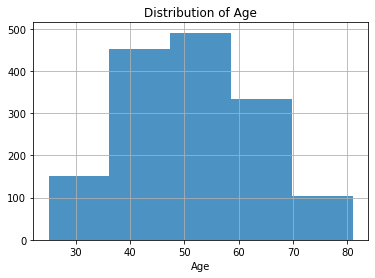

In [41]:
#What does the average customer look like for this company? (distribution of ages in the dataset)

plt.figure(figsize=(10,8))

df_final.hist('Age', bins=5, alpha=0.8);
plt.title('Distribution of Age');
plt.xlabel('Age');

<Figure size 720x576 with 0 Axes>

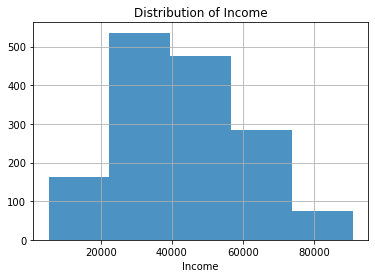

In [42]:
#What does the average customer look like for this company? (distribution of income in the dataset)

plt.figure(figsize=(10,8))

df_final.hist('Income', bins=5, alpha=0.8);
plt.title('Distribution of Income');
plt.xlabel('Income');

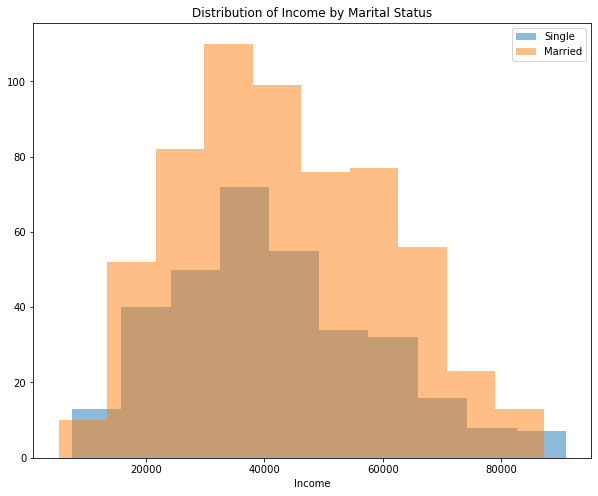

In [43]:
#What does the average customer look like for this company? (married people have higher income)

plt.figure(figsize=(10,8))

plt.hist('Income', data=df_final[df_final['Marital_Status'] == 'Single'], alpha=0.5, label='Single');
plt.hist('Income', data=df_final[df_final['Marital_Status'] == 'Married'], alpha=0.5, label='Married');
plt.title('Distribution of Income by Marital Status');
plt.xlabel('Income');
plt.legend();

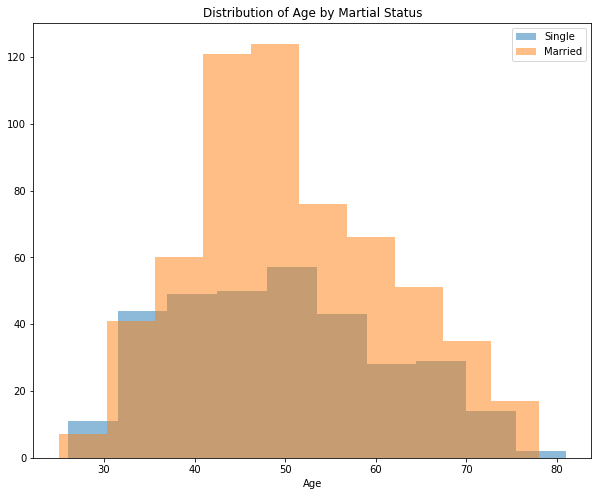

In [44]:
#What does the average customer look like for this company? (most people around 40-50 are married)
plt.figure(figsize=(10,8))
plt.hist('Age', data=df_final[df_final['Marital_Status'] == 'Single'], alpha=0.5, label='Single');
plt.hist('Age', data=df_final[df_final['Marital_Status'] == 'Married'], alpha=0.5, label='Married');
plt.title('Distribution of Age by Martial Status');
plt.xlabel('Age');
plt.legend();

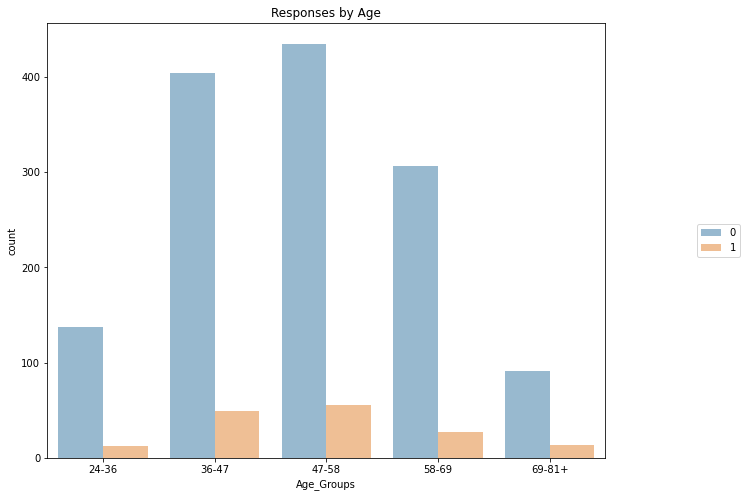

In [45]:
#What does the average customer look like for this company? (Responses by age)
plt.figure(figsize=(10,8))

a = sns.countplot(x="Age_Groups", hue="Response", data=df_final, alpha=.5);
plt.title('Responses by Age');

leg = a.get_legend()
a.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)

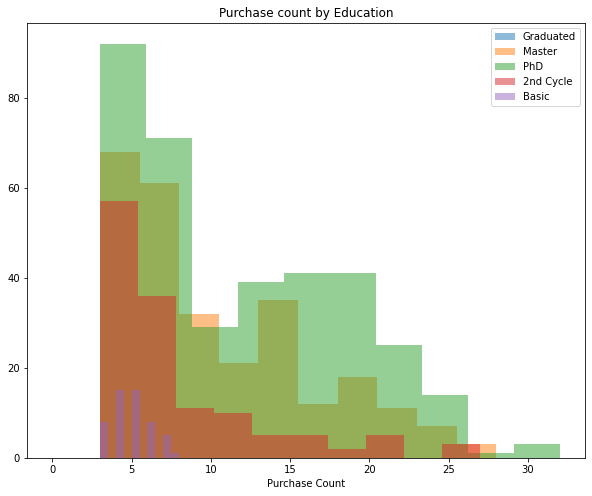

In [46]:
#What does the average customer look like for this company? (purchase count by education status)
plt.figure(figsize=(10,8))

plt.hist('Count_Purchased', data=df_final[df_final['Education'] == 'Graduated'], alpha=0.5, label='Graduated');
plt.hist('Count_Purchased', data=df_final[df_final['Education'] == 'Master'], alpha=0.5, label='Master');
plt.hist('Count_Purchased', data=df_final[df_final['Education'] == 'PhD'], alpha=0.5, label='PhD');
plt.hist('Count_Purchased', data=df_final[df_final['Education'] == '2n Cycle'], alpha=0.5, label='2nd Cycle');
plt.hist('Count_Purchased', data=df_final[df_final['Education'] == 'Basic'], alpha=0.5, label='Basic');

plt.title('Purchase count by Education');
plt.xlabel('Purchase Count');
plt.legend();

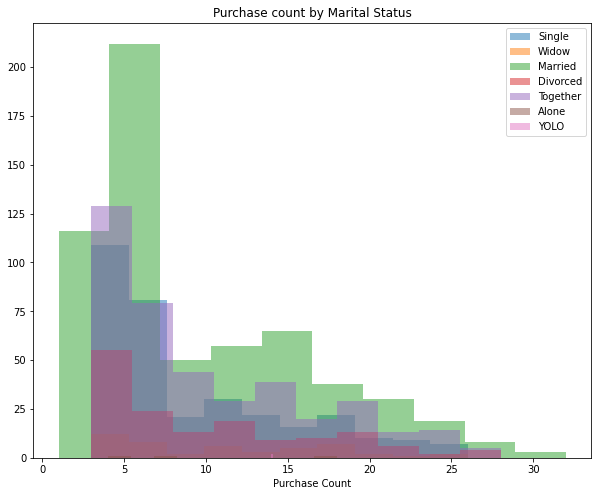

In [47]:
#What does the average customer look like for this company? (purchase count by marital status)
plt.figure(figsize=(10,8))

plt.hist('Count_Purchased', data=df_final[df_final['Marital_Status'] == 'Single'], alpha=0.5, label='Single');
plt.hist('Count_Purchased', data=df_final[df_final['Marital_Status'] == 'Widow'], alpha=0.5, label='Widow');
plt.hist('Count_Purchased', data=df_final[df_final['Marital_Status'] == 'Married'], alpha=0.5, label='Married');
plt.hist('Count_Purchased', data=df_final[df_final['Marital_Status'] == 'Divorced'], alpha=0.5, label='Divorced');
plt.hist('Count_Purchased', data=df_final[df_final['Marital_Status'] == 'Together'], alpha=0.5, label='Together');
plt.hist('Count_Purchased', data=df_final[df_final['Marital_Status'] == 'Alone'], alpha=0.5, label='Alone');
plt.hist('Count_Purchased', data=df_final[df_final['Marital_Status'] == 'YOLO'], alpha=0.5, label='YOLO');

plt.title('Purchase count by Marital Status');
plt.xlabel('Purchase Count');
plt.legend();

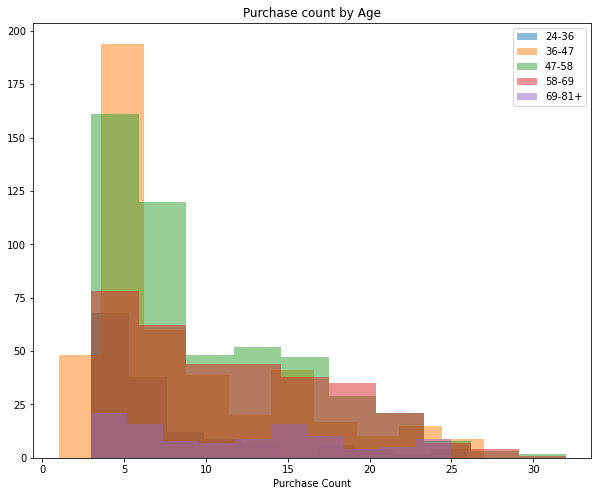

In [48]:
#What does the average customer look like for this company? (purchase count by age group)
plt.figure(figsize=(10,8))

plt.hist('Count_Purchased', data=df_final[df_final['Age_Groups'] == '24-36'], alpha=0.5, label='24-36');
plt.hist('Count_Purchased', data=df_final[df_final['Age_Groups'] == '36-47'], alpha=0.5, label='36-47');
plt.hist('Count_Purchased', data=df_final[df_final['Age_Groups'] == '47-58'], alpha=0.5, label='47-58');
plt.hist('Count_Purchased', data=df_final[df_final['Age_Groups'] == '58-69'], alpha=0.5, label='58-69');
plt.hist('Count_Purchased', data=df_final[df_final['Age_Groups'] == '69-81+'], alpha=0.5, label='69-81+');

plt.title('Purchase count by Age');
plt.xlabel('Purchase Count');
plt.legend();

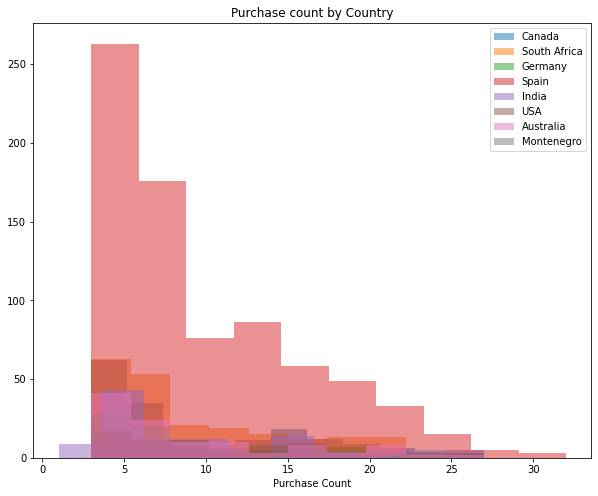

In [49]:
#What does the average customer look like for this company? (purchase count by country)
plt.figure(figsize=(10,8))

plt.hist('Count_Purchased', data=df_final[df_final['Country'] == 'CA'], alpha=0.5, label='Canada');
plt.hist('Count_Purchased', data=df_final[df_final['Country'] == 'SA'], alpha=0.5, label='South Africa');
plt.hist('Count_Purchased', data=df_final[df_final['Country'] == 'GER'], alpha=0.5, label='Germany');
plt.hist('Count_Purchased', data=df_final[df_final['Country'] == 'SP'], alpha=0.5, label='Spain');
plt.hist('Count_Purchased', data=df_final[df_final['Country'] == 'IND'], alpha=0.5, label='India');
plt.hist('Count_Purchased', data=df_final[df_final['Country'] == 'US'], alpha=0.5, label='USA');
plt.hist('Count_Purchased', data=df_final[df_final['Country'] == 'AUS'], alpha=0.5, label='Australia');
plt.hist('Count_Purchased', data=df_final[df_final['Country'] == 'ME'], alpha=0.5, label='Montenegro');

plt.title('Purchase count by Country');
plt.xlabel('Purchase Count');
plt.legend();

<b>Comment</b>: From what we understand about the data so far, <b>it seems that the average customer for this company is an older married person from Spain with a higher income who has a masters or phd. </b>

# 3. Statistical Analysis 

In this part we will use statistical tests to see if there can potentially be a significant relationship between any of the variables. 

<b>3 Hypothesis to be Tested:</b>

  1. There is a dependent relationship (correlation) between purchase count & accepted campaign count: 
      - H0: Purchase Count and Accepted Campaign Count are independent. 
      - H1: Purchase Count and Accepted Campaign Count are dependent.    
  2. There is a significant difference in the mean from the first/last 10% of the purchase count:
      - H0: The means of the samples are equal. 
      - H1: The means of the samples are not equal. 
  3. There is a significant difference in the mean from the first/middle/last 10% of the purchase count:
      - H0: The means of the samples are equal. 
      - H1: One or more of the means of the samples are unequal.

In [50]:
#correlation test between purchases and acceptences of campaigns 
from scipy.stats import pearsonr
data1 = df_final['NumWebPurchases']
data2 = df_final['Count_Accepted']
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.238, p=0.000
Probably dependent


In [51]:
#creating samples of 'Count_Purchased' to check significant relationships
df_stats = df_final[['Dt_Customer', 'Count_Purchased']].set_index(['Dt_Customer'])

df_stats = df_stats.sort_index()

#First 10% of column
first = df_stats.iloc[:154]

#Middle 10% of column
middle = df_stats.iloc[800:960]


#Last 10% of column
last = df_stats.iloc[1380:]

display(df_stats)

,Count_Purchased
Dt_Customer,
2012-07-30,14
2012-08-01,6
2012-08-01,7
2012-08-02,3
2012-08-03,13
...,...
2014-06-27,5
2014-06-28,20
2014-06-28,13


In [52]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
data1 = first
data2 = last
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=3.841, p=0.000
Probably different distributions


In [53]:
from scipy.stats import f_oneway
data1 = first
data2 = middle
data3 = last
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=7.550, p=0.001
Probably different distributions


Text(0.5, 1.0, 'First 10%')

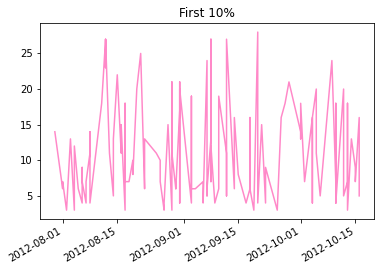

In [54]:
#first 10% of the sorted purchase rate
fig, ax = plt.subplots()
ax.plot(first, color='deeppink', alpha=.5)
# Rotate and align the tick labels so they look better.
fig.autofmt_xdate()
# Use a more precise date string for the x axis locations in the toolbar.
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_title('First 10%')

Text(0.5, 1.0, 'Middle 10%')

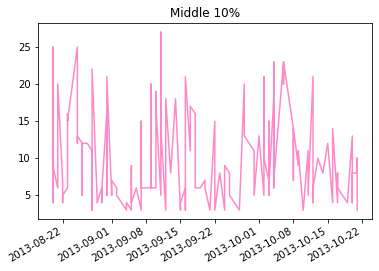

In [55]:
#middle 10% of the sorted purchase rate
fig, ax = plt.subplots()
ax.plot(middle, color='deeppink', alpha=.5)
# Rotate and align the tick labels so they look better.
fig.autofmt_xdate()
# Use a more precise date string for the x axis locations in the toolbar.
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_title('Middle 10%')

Text(0.5, 1.0, 'Last 10%')

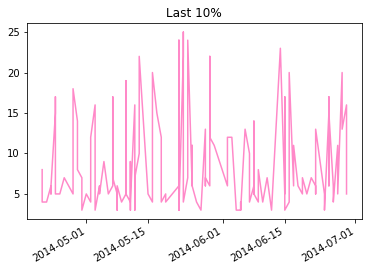

In [56]:
#last 10% of the sorted purchase rate
fig, ax = plt.subplots()
ax.plot(last, color='deeppink', alpha=.5)
# Rotate and align the tick labels so they look better.
fig.autofmt_xdate()
# Use a more precise date string for the x axis locations in the toolbar.
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_title('Last 10%')

# 4. Further Thoughts

This notebook provided a simple EDA and statistical analysis of a set of marketing data, here are some further thoughts on how the analysis can go in more detail. 

- The quality of this dataset is overall not bad, there were only 24 missing values in the 'Income' column that could be easily replaced. 
- To dig deeper into more complex and detailed analysis it would have been interesting to have more data regarding males and females specifically, in addition to online behaviour by the customers on the website. 
- With additional data it could be interesting to build a clustering algorithm to further understand, and perhaps create different customer personas. The customer personas could then be run through a classification algorithm to classify them based on different behaviour that could be used to drive marketing campaigns. 